<a href="https://colab.research.google.com/github/tayfununal/PyTorch/blob/main/J_T_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [405]:
import numpy as np
import torch
from torch import nn, optim
import torchvision
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [406]:
dataset = load_digits()

In [407]:
x = dataset.data
y = dataset.target

In [408]:
x.shape, y.shape

((1797, 64), (1797,))

In [409]:
ones = torch.from_numpy(x[y == 1]).to(torch.float32)

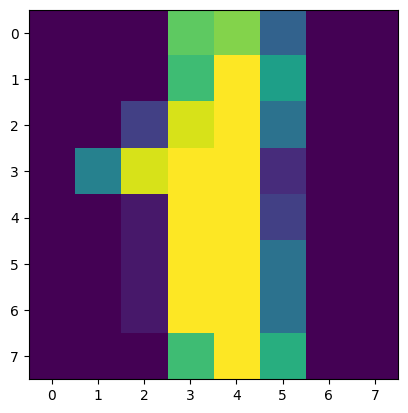

In [410]:

plt.imshow(ones[0].reshape((8,8)))

In [411]:
D = 64
model = nn.Sequential(nn.Linear(D,D))

In [412]:
x_hat = model.forward(ones[0])

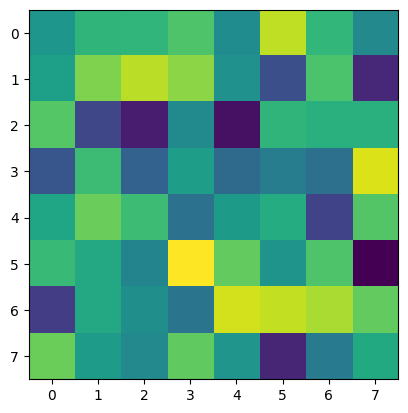

In [413]:
plt.imshow(x_hat.detach().numpy().reshape((8,8)))

In [414]:
prior = torch.distributions.MultivariateNormal(loc=torch.zeros(64), scale_tril=torch.eye(64))

In [415]:
prior.sample([1])

tensor([[ 1.8146e-01, -4.8106e-01,  4.4034e-02,  3.5054e-01, -9.4610e-03,
          1.8498e-02, -3.8465e-01,  1.6369e+00, -6.9996e-01, -8.9054e-01,
         -1.1377e+00,  5.4330e-01,  5.3379e-01, -2.9422e-01, -1.9777e+00,
         -2.7260e-01, -5.4173e-01, -3.3395e+00,  1.1524e+00, -6.4423e-01,
          7.6024e-02,  1.3297e+00,  1.1741e+00, -7.6171e-01,  1.0522e+00,
          1.2969e-01, -1.4771e+00, -4.7019e-01,  3.2872e-01, -1.1790e-01,
          8.4557e-01, -1.1115e+00,  1.3636e+00,  1.1758e+00, -8.3815e-01,
          4.0265e-01, -2.0009e-01,  9.3582e-01, -6.1487e-01,  2.3181e-03,
         -1.4730e+00, -2.1083e+00,  6.6362e-01,  9.5277e-01,  2.6728e+00,
         -3.4687e-01, -3.5911e-01, -1.4210e+00,  2.2022e+00, -1.1670e+00,
          1.9467e+00,  2.2214e+00,  9.2778e-01,  2.2660e+00, -5.4684e-01,
          1.6868e+00,  1.7179e+00, -1.0213e+00, -1.8667e-01, -1.6993e+00,
          2.3146e-01,  1.1914e+00, -9.1817e-01,  1.5295e+00]])

In [416]:
def criterion(z, prior, parameters):
  log_det_j = torch.linalg.det(torch.linalg.pinv(parameters['0.weight']))

  loss = - (prior.log_prob(z) - log_det_j).mean()

  return loss

In [417]:
model.state_dict()['0.weight']

tensor([[-0.0071, -0.1188, -0.0680,  ..., -0.0083,  0.1027, -0.0546],
        [ 0.0592,  0.1037,  0.0594,  ..., -0.0237,  0.0367, -0.1066],
        [ 0.0207, -0.0689,  0.1027,  ..., -0.0505, -0.0892,  0.0805],
        ...,
        [ 0.0561,  0.1175,  0.0272,  ...,  0.0985, -0.0184,  0.0697],
        [ 0.0303, -0.1246, -0.0699,  ...,  0.1135, -0.0508, -0.0915],
        [ 0.0382, -0.0619,  0.0638,  ...,  0.0756,  0.1099, -0.0355]])

In [418]:
model.state_dict()['0.bias']

tensor([ 0.0133,  0.1029,  0.0572,  0.0103,  0.0729,  0.1104,  0.0585,  0.0515,
         0.1126,  0.1070, -0.1148,  0.0017,  0.0774, -0.0530,  0.0469,  0.1055,
         0.0705,  0.0885, -0.0406, -0.1099, -0.0289,  0.0429, -0.0405, -0.0208,
         0.0198,  0.0310,  0.0583,  0.0037, -0.1042,  0.0325,  0.0366, -0.0517,
         0.0183,  0.0636,  0.0922, -0.0037,  0.0878, -0.0256, -0.0508, -0.0260,
        -0.0650, -0.0586, -0.0378, -0.0119,  0.1201, -0.0610, -0.0493,  0.1143,
        -0.1123,  0.1079,  0.1177, -0.0741, -0.0461,  0.0671, -0.0033,  0.0620,
        -0.0543, -0.0476,  0.1207,  0.0996,  0.0779,  0.0794, -0.0744,  0.0829])

In [419]:
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 10
for epoch in range(n_epochs):
  z = model(ones)
  loss = criterion(z, prior, model.state_dict())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [420]:
a = torch.matmul(torch.linalg.pinv(model.state_dict()['0.weight']), prior.sample([1]).T - model.state_dict()['0.bias'].reshape((64,1)))
a.mean()

tensor(-0.0015)

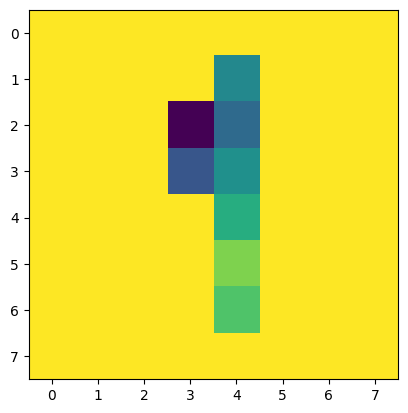

In [421]:
plt.imshow(np.clip(a, a.min(), a.mean()-0.0025).detach().numpy().reshape((8,8)))

In [422]:
model(ones).mean()

tensor(-2.1741e+14, grad_fn=<MeanBackward0>)